# Practice for GWAS 

- 강의 PDF : http://healthstat.snu.ac.kr/data/GWAS_practice.pdf
- 실습 데이터 : http://healthstat.snu.ac.kr/data/data.zip
- plink : http://pngu.mgh.harvard.edu/~purcell/plink/download.shtml#download
- plink는 다운로드후에 압축을 풀고, ***path을 꼭 설정***이 필요함.
- 리눅스 명령어(gawk 등)를 win32로 포팅한 유틸리티 : http://unxutils.sourceforge.net/
    - unxutils을 다운로드후 압축을 풀고 ***path을 꼭 설정***

In [1]:
system("plink", intern = TRUE )

Warning message:
: 명령 'plink'의 실행으로 상태 1가 되었습니다

[1] ""                                                                  
 [2] "@----------------------------------------------------------@"      
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"      
 [4] "|----------------------------------------------------------|"      
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"      
 [6] "|----------------------------------------------------------|"      
 [7] "|  For documentation, citation & bug-report instructions:  |"      
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"      
 [9] "@----------------------------------------------------------@"      
[10] ""                                                                  
[11] "Web-based version check ( --noweb to skip )"                       
[12] "Connecting to web...  OK, v1.07 is current"                        
[13] ""                                                                  
[14] "+++ PLINK 1.9 is now available! See above website for details +++ "
[15] ""                                                                  
[16] "Writing this text to log file [ plink.log ]"                       
[17] "Analysis started: Sun May 01 07:48:29 2016"                        
[18] ""                                                                  
[19] "Options in effect:"                                                
[20] ""                                                                  
[21] "Before frequency and genotyping pruning, there are 0 SNPs"         
[22] "0 founders and 0 non-founders found"                               
[23] "0 SNPs failed missingness test ( GENO > 1 )"                       
[24] "0 SNPs failed frequency test ( MAF < 0 )"                          
[25] "After frequency and genotyping pruning, there are 0 SNPs"          
attr(,"status")
[1] 1

### Preliminary association analysis (allelic)

In [12]:
system("plink --bfile D:/data/sample --assoc --noweb --out D:/data/sample", intern = TRUE )

[1] ""                                                                 
 [2] "@----------------------------------------------------------@"     
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"     
 [4] "|----------------------------------------------------------|"     
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"     
 [6] "|----------------------------------------------------------|"     
 [7] "|  For documentation, citation & bug-report instructions:  |"     
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"     
 [9] "@----------------------------------------------------------@"     
[10] ""                                                                 
[11] "Skipping web check... [ --noweb ] "                               
[12] "Writing this text to log file [ D:/data/sample.log ]"             
[13] "Analysis started: Sat Apr 30 22:19:09 2016"                       
[14] ""                                                                 
[15] "Options in effect:"                                               
[16] "\t--bfile D:/data/sample"                                         
[17] "\t--assoc"                                                        
[18] "\t--noweb"                                                        
[19] "\t--out D:/data/sample"                                           
[20] ""                                                                 
[21] "Reading map (extended format) from [ D:/data/sample.bim ] "       
[22] "9999 markers to be included from [ D:/data/sample.bim ]"          
[23] "Reading pedigree information from [ D:/data/sample.fam ] "        
[24] "1000 individuals read from [ D:/data/sample.fam ] "               
[25] "1000 individuals with nonmissing phenotypes"                      
[26] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"            
[27] "Missing phenotype value is also -9"                               
[28] "500 cases, 500 controls and 0 missing"                            
[29] "504 males, 496 females, and 0 of unspecified sex"                 
[30] "Reading genotype bitfile from [ D:/data/sample.bed ] "            
[31] "Detected that binary PED file is v1.00 SNP-major mode"            
[32] "Before frequency and genotyping pruning, there are 9999 SNPs"     
[33] "1000 founders and 0 non-founders found"                           
[34] "Total genotyping rate in remaining individuals is 0.99702"        
[35] "0 SNPs failed missingness test ( GENO > 1 )"                      
[36] "0 SNPs failed frequency test ( MAF < 0 )"                         
[37] "After frequency and genotyping pruning, there are 9999 SNPs"      
[38] "After filtering, 500 cases, 500 controls and 0 missing"           
[39] "After filtering, 504 males, 496 females, and 0 of unspecified sex"
[40] "Writing main association results to [ D:/data/sample.assoc ] "    
[41] ""                                                                 
[42] "Analysis finished: Sat Apr 30 22:19:10 2016"                      
[43] ""

- 샘플 데이터 있는 곳을 작업 디렉토리를 변경함.

In [2]:
setwd("D:/data")
getwd()

[1] "D:/data"

- Output file sample.assoc

In [58]:
# CHR          SNP         BP   A1      F_A      F_U   A2        CHISQ            P           OR 
#   1   rs11730743    2924172    C    0.178    0.189    A       0.4038       0.5251       0.9292 
#   1    rs5000660    3227034    G    0.378    0.397    A       0.7605       0.3832       0.9231 
#   1    rs2936507    4036902    C  0.09739    0.091    G       0.2388       0.6251        1.078 
col.names <- c("CHR", "SNP", "BP", "A1", "F_A", "F_U", "A2", "CHISQ", "P", "OR" )

sample.assoc <- read.fwf("sample.assoc", c(4, 13, 11, 5, 9, 9, 5, 13, 13, 13), skip=1, col.names=col.names, strip.white=TRUE )
head( sample.assoc )
summary( sample.assoc )

CHR        SNP      BP A1     F_A    F_U A2    CHISQ      P     OR
1   1 rs11730743 2924172  C 0.17800 0.1890  A 0.403800 0.5251 0.9292
2   1  rs5000660 3227034  G 0.37800 0.3970  A 0.760500 0.3832 0.9231
3   1  rs2936507 4036902  C 0.09739 0.0910  G 0.238800 0.6251 1.0780
4   1 rs10926659 4280876  G 0.10420 0.1190  A 1.102000 0.2938 0.8612
5   1 rs10878298 4381492  G 0.15310 0.1548  T 0.011210 0.9157 0.9868
6   1  rs1504600 4459761  T 0.21600 0.2170  C 0.002948 0.9567 0.9941

      CHR                 SNP             BP            A1      
 Min.   : 1.000   rs10000610:   1   Min.   :    49698   A:2653  
 1st Qu.: 4.000   rs10000873:   1   1st Qu.: 31280642   C:2375  
 Median : 8.000   rs10000940:   1   Median : 68139328   G:2472  
 Mean   : 8.691   rs10002459:   1   Mean   : 77689720   T:2499  
 3rd Qu.:13.000   rs10002719:   1   3rd Qu.:113432358           
 Max.   :22.000   rs10004248:   1   Max.   :246254288           
                  (Other)   :9993                               
      F_A              F_U        A2           CHISQ         
 Min.   :0.0360   Min.   :0.033   A:2517   Min.   : 0.00000  
 1st Qu.:0.1509   1st Qu.:0.151   C:2753   1st Qu.: 0.09945  
 Median :0.2590   Median :0.260   G:2721   Median : 0.45370  
 Mean   :0.2657   Mean   :0.266   T:2008   Mean   : 1.00418  
 3rd Qu.:0.3790   3rd Qu.:0.378            3rd Qu.: 1.29800  
 Max.   :0.5260   Max.   :0.533            Max.   :15.75000  
                                              

### Allele frequencies

In [59]:
system("plink --bfile D:/data/sample --freq --noweb --out D:/data/sample", intern = TRUE )

[1] ""                                                                     
 [2] "@----------------------------------------------------------@"         
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"         
 [4] "|----------------------------------------------------------|"         
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"         
 [6] "|----------------------------------------------------------|"         
 [7] "|  For documentation, citation & bug-report instructions:  |"         
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"         
 [9] "@----------------------------------------------------------@"         
[10] ""                                                                     
[11] "Skipping web check... [ --noweb ] "                                   
[12] "Writing this text to log file [ D:/data/sample.log ]"                 
[13] "Analysis started: Sat Apr 30 23:02:26 2016"                           
[14] ""                                                                     
[15] "Options in effect:"                                                   
[16] "\t--bfile D:/data/sample"                                             
[17] "\t--freq"                                                             
[18] "\t--noweb"                                                            
[19] "\t--out D:/data/sample"                                               
[20] ""                                                                     
[21] "Reading map (extended format) from [ D:/data/sample.bim ] "           
[22] "9999 markers to be included from [ D:/data/sample.bim ]"              
[23] "Reading pedigree information from [ D:/data/sample.fam ] "            
[24] "1000 individuals read from [ D:/data/sample.fam ] "                   
[25] "1000 individuals with nonmissing phenotypes"                          
[26] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"                
[27] "Missing phenotype value is also -9"                                   
[28] "500 cases, 500 controls and 0 missing"                                
[29] "504 males, 496 females, and 0 of unspecified sex"                     
[30] "Reading genotype bitfile from [ D:/data/sample.bed ] "                
[31] "Detected that binary PED file is v1.00 SNP-major mode"                
[32] "Before frequency and genotyping pruning, there are 9999 SNPs"         
[33] "1000 founders and 0 non-founders found"                               
[34] "Writing allele frequencies (founders-only) to [ D:/data/sample.frq ] "
[35] ""                                                                     
[36] "Analysis finished: Sat Apr 30 23:02:27 2016"                          
[37] ""

- Output file sample.frq

In [61]:
# CHR          SNP   A1   A2          MAF  NCHROBS
#   1   rs11730743    C    A       0.1835     2000
#   1    rs5000660    G    A       0.3875     2000
#   1    rs2936507    C    G      0.09419     1996
col.names <- c("CHR", "SNP", "A1", "A2", "MAF", "NCHROBS")

sample.frq <- read.fwf("sample.frq", c(4, 13, 5, 5, 13, 9), skip=1, col.names=col.names, strip.white=TRUE )
head( sample.frq )
summary( sample.frq )

CHR        SNP A1 A2     MAF NCHROBS
1   1 rs11730743  C  A 0.18350    2000
2   1  rs5000660  G  A 0.38750    2000
3   1  rs2936507  C  G 0.09419    1996
4   1 rs10926659  G  A 0.11160    1998
5   1 rs10878298  G  T 0.15390    1962
6   1  rs1504600  T  C 0.21650    2000

      CHR                 SNP       A1       A2            MAF        
 Min.   : 1.000   rs10000610:   1   A:2653   A:2517   Min.   :0.0395  
 1st Qu.: 4.000   rs10000873:   1   C:2375   C:2753   1st Qu.:0.1505  
 Median : 8.000   rs10000940:   1   G:2472   G:2721   Median :0.2590  
 Mean   : 8.691   rs10002459:   1   T:2499   T:2008   Mean   :0.2658  
 3rd Qu.:13.000   rs10002719:   1                     3rd Qu.:0.3790  
 Max.   :22.000   rs10004248:   1                     Max.   :0.5000  
                  (Other)   :9993                                     
    NCHROBS    
 Min.   :1882  
 1st Qu.:1994  
 Median :2000  
 Mean   :1994  
 3rd Qu.:2000  
 Max.   :2000  
               

### Genotyping rate per individual and per marker

In [62]:
system("plink --bfile D:/data/sample --missing --noweb --out D:/data/sample", intern = TRUE )

[1] ""                                                                       
 [2] "@----------------------------------------------------------@"           
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"           
 [4] "|----------------------------------------------------------|"           
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"           
 [6] "|----------------------------------------------------------|"           
 [7] "|  For documentation, citation & bug-report instructions:  |"           
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"           
 [9] "@----------------------------------------------------------@"           
[10] ""                                                                       
[11] "Skipping web check... [ --noweb ] "                                     
[12] "Writing this text to log file [ D:/data/sample.log ]"                   
[13] "Analysis started: Sat Apr 30 23:08:38 2016"                             
[14] ""                                                                       
[15] "Options in effect:"                                                     
[16] "\t--bfile D:/data/sample"                                               
[17] "\t--missing"                                                            
[18] "\t--noweb"                                                              
[19] "\t--out D:/data/sample"                                                 
[20] ""                                                                       
[21] "Reading map (extended format) from [ D:/data/sample.bim ] "             
[22] "9999 markers to be included from [ D:/data/sample.bim ]"                
[23] "Reading pedigree information from [ D:/data/sample.fam ] "              
[24] "1000 individuals read from [ D:/data/sample.fam ] "                     
[25] "1000 individuals with nonmissing phenotypes"                            
[26] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"                  
[27] "Missing phenotype value is also -9"                                     
[28] "500 cases, 500 controls and 0 missing"                                  
[29] "504 males, 496 females, and 0 of unspecified sex"                       
[30] "Reading genotype bitfile from [ D:/data/sample.bed ] "                  
[31] "Detected that binary PED file is v1.00 SNP-major mode"                  
[32] "Before frequency and genotyping pruning, there are 9999 SNPs"           
[33] "1000 founders and 0 non-founders found"                                 
[34] "Writing individual missingness information to [ D:/data/sample.imiss ] "
[35] "Writing locus missingness information to [ D:/data/sample.lmiss ] "     
[36] "Total genotyping rate in remaining individuals is 0.99702"              
[37] "0 SNPs failed missingness test ( GENO > 1 )"                            
[38] "0 SNPs failed frequency test ( MAF < 0 )"                               
[39] "After frequency and genotyping pruning, there are 9999 SNPs"            
[40] "After filtering, 500 cases, 500 controls and 0 missing"                 
[41] "After filtering, 504 males, 496 females, and 0 of unspecified sex"      
[42] ""                                                                       
[43] "Analysis finished: Sat Apr 30 23:08:40 2016"                            
[44] ""

- Per-individual genotyping/missing rate
- File : sample.imiss

In [66]:
#           FID            IID MISS_PHENO   N_MISS   N_GENO   F_MISS
#  KNIHGR003156   KNIHGR003156          N       14     9999   0.0014
#  KNIHGR008787   KNIHGR008787          N       16     9999   0.0016
col.names <- c("FID", "IID", "MISS_PHENO", "N_MISS", "N_GENO", "F_MISS")

sample.imiss <- read.fwf("sample.imiss", c(14, 15, 11, 9, 9, 10), skip=1, col.names=col.names, strip.white=TRUE )
head( sample.imiss )
summary( sample.imiss )

FID          IID MISS_PHENO N_MISS N_GENO    F_MISS
1 KNIHGR003156 KNIHGR003156          N     14   9999 0.0014000
2 KNIHGR008787 KNIHGR008787          N     16   9999 0.0016000
3 KNIHGR007207 KNIHGR007207          N     30   9999 0.0030000
4 KNIHGR008203 KNIHGR008203          N     21   9999 0.0021000
5 KNIHGR003098 KNIHGR003098          N      9   9999 0.0009001
6 KNIHGR004954 KNIHGR004954          N     24   9999 0.0024000

           FID                IID      MISS_PHENO     N_MISS     
 KNIHGR000005:  1   KNIHGR000005:  1   N:1000     Min.   :  1.0  
 KNIHGR000007:  1   KNIHGR000007:  1              1st Qu.: 12.0  
 KNIHGR000014:  1   KNIHGR000014:  1              Median : 21.0  
 KNIHGR000017:  1   KNIHGR000017:  1              Mean   : 29.8  
 KNIHGR000021:  1   KNIHGR000021:  1              3rd Qu.: 38.0  
 KNIHGR000035:  1   KNIHGR000035:  1              Max.   :150.0  
 (Other)     :994   (Other)     :994                             
     N_GENO         F_MISS       
 Min.   :9999   Min.   :0.00010  
 1st Qu.:9999   1st Qu.:0.00120  
 Median :9999   Median :0.00210  
 Mean   :9999   Mean   :0.00298  
 3rd Qu.:9999   3rd Qu.:0.00380  
 Max.   :9999   Max.   :0.01500  
                                 

- Per-marker (locus) genotyping/missing rate
- File : sample.lmiss

In [68]:
# CHR          SNP   N_MISS   N_GENO   F_MISS
#   1   rs11730743        0     1000        0
#   1    rs5000660        0     1000        0
#   1    rs2936507        2     1000    0.002
col.names <- c("CHR", "SNP", "N_MISS", "N_GENO", "F_MISS")

sample.lmiss <- read.fwf("sample.lmiss", c(4, 13, 9, 9, 9), skip=1, col.names=col.names, strip.white=TRUE )
head( sample.lmiss )
summary( sample.lmiss )

CHR        SNP N_MISS N_GENO F_MISS
1   1 rs11730743      0   1000  0.000
2   1  rs5000660      0   1000  0.000
3   1  rs2936507      2   1000  0.002
4   1 rs10926659      1   1000  0.001
5   1 rs10878298     19   1000  0.019
6   1  rs1504600      0   1000  0.000

      CHR                 SNP           N_MISS           N_GENO    
 Min.   : 1.000   rs10000610:   1   Min.   : 0.000   Min.   :1000  
 1st Qu.: 4.000   rs10000873:   1   1st Qu.: 0.000   1st Qu.:1000  
 Median : 8.000   rs10000940:   1   Median : 0.000   Median :1000  
 Mean   : 8.691   rs10002459:   1   Mean   : 2.981   Mean   :1000  
 3rd Qu.:13.000   rs10002719:   1   3rd Qu.: 3.000   3rd Qu.:1000  
 Max.   :22.000   rs10004248:   1   Max.   :59.000   Max.   :1000  
                  (Other)   :9993                                  
     F_MISS        
 Min.   :0.000000  
 1st Qu.:0.000000  
 Median :0.000000  
 Mean   :0.002981  
 3rd Qu.:0.003000  
 Max.   :0.059000  
                   

### Check for Hardy-Weinberg disequilibrium

In [70]:
system("plink --bfile D:/data/sample --test-missing --noweb --out D:/data/sample", intern = TRUE )

[1] ""                                                                    
 [2] "@----------------------------------------------------------@"        
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"        
 [4] "|----------------------------------------------------------|"        
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"        
 [6] "|----------------------------------------------------------|"        
 [7] "|  For documentation, citation & bug-report instructions:  |"        
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"        
 [9] "@----------------------------------------------------------@"        
[10] ""                                                                    
[11] "Skipping web check... [ --noweb ] "                                  
[12] "Writing this text to log file [ D:/data/sample.log ]"                
[13] "Analysis started: Sat Apr 30 23:19:23 2016"                          
[14] ""                                                                    
[15] "Options in effect:"                                                  
[16] "\t--bfile D:/data/sample"                                            
[17] "\t--test-missing"                                                    
[18] "\t--noweb"                                                           
[19] "\t--out D:/data/sample"                                              
[20] ""                                                                    
[21] "Reading map (extended format) from [ D:/data/sample.bim ] "          
[22] "9999 markers to be included from [ D:/data/sample.bim ]"             
[23] "Reading pedigree information from [ D:/data/sample.fam ] "           
[24] "1000 individuals read from [ D:/data/sample.fam ] "                  
[25] "1000 individuals with nonmissing phenotypes"                         
[26] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"               
[27] "Missing phenotype value is also -9"                                  
[28] "500 cases, 500 controls and 0 missing"                               
[29] "504 males, 496 females, and 0 of unspecified sex"                    
[30] "Reading genotype bitfile from [ D:/data/sample.bed ] "               
[31] "Detected that binary PED file is v1.00 SNP-major mode"               
[32] "Before frequency and genotyping pruning, there are 9999 SNPs"        
[33] "1000 founders and 0 non-founders found"                              
[34] "Total genotyping rate in remaining individuals is 0.99702"           
[35] "0 SNPs failed missingness test ( GENO > 1 )"                         
[36] "0 SNPs failed frequency test ( MAF < 0 )"                            
[37] "After frequency and genotyping pruning, there are 9999 SNPs"         
[38] "After filtering, 500 cases, 500 controls and 0 missing"              
[39] "After filtering, 504 males, 496 females, and 0 of unspecified sex"   
[40] "Writing case/control missingness test to [ D:/data/sample.missing ] "
[41] ""                                                                    
[42] "Analysis finished: Sat Apr 30 23:19:25 2016"                         
[43] ""

- Output file: sample.missing

In [71]:
# CHR          SNP     F_MISS_A     F_MISS_U            P 
#   1   rs11730743            0            0            1
#   1    rs5000660            0            0            1
#   1    rs2936507        0.004            0       0.4995
col.names <- c("CHR", "SNP", "F_MISS_A", "F_MISS_U", "P")

sample.missing <- read.fwf("sample.missing", c(4, 13, 13, 13, 13), skip=1, col.names=col.names, strip.white=TRUE )
head( sample.missing )
summary( sample.missing )

CHR        SNP F_MISS_A F_MISS_U      P
1   1 rs11730743    0.000    0.000 1.0000
2   1  rs5000660    0.000    0.000 1.0000
3   1  rs2936507    0.004    0.000 0.4995
4   1 rs10926659    0.002    0.000 1.0000
5   1 rs10878298    0.020    0.018 1.0000
6   1  rs1504600    0.000    0.000 1.0000

      CHR                 SNP          F_MISS_A           F_MISS_U       
 Min.   : 1.000   rs10000610:   1   Min.   :0.000000   Min.   :0.000000  
 1st Qu.: 4.000   rs10000873:   1   1st Qu.:0.000000   1st Qu.:0.000000  
 Median : 8.000   rs10000940:   1   Median :0.000000   Median :0.000000  
 Mean   : 8.691   rs10002459:   1   Mean   :0.003059   Mean   :0.002902  
 3rd Qu.:13.000   rs10002719:   1   3rd Qu.:0.002000   3rd Qu.:0.002000  
 Max.   :22.000   rs10004248:   1   Max.   :0.066000   Max.   :0.068000  
                  (Other)   :9993                                        
       P            
 Min.   :0.0004567  
 1st Qu.:1.0000000  
 Median :1.0000000  
 Mean   :0.9072433  
 3rd Qu.:1.0000000  
 Max.   :1.0000000  
                    

### Check for gender inconsistency: possible only if there are X-linked SNPs

system("plink --bfile D:/data/sample --check-sex --out D:/data/sample_sex --noweb ", intern = TRUE )

- grep PROBLEM sample_sex.sexcheck > failsexcheck.txt 와 동일한 windows 명령어
- 명령창( 도스창 )에서 아래와 명령어를 실행시킴.

```
findstr -N "PROBLEM" D:/data/sample_sex.sexcheck  >  D:/data/fail-sexcheck.txt
```

In [83]:
list.files( "D:/data/", full.names = T )

[1] "D:/data/fail-sexcheck.txt"   "D:/data/sample.assoc"       
 [3] "D:/data/sample.bed"          "D:/data/sample.bim"         
 [5] "D:/data/sample.fam"          "D:/data/sample.frq"         
 [7] "D:/data/sample.imiss"        "D:/data/sample.lmiss"       
 [9] "D:/data/sample.log"          "D:/data/sample.missing"     
[11] "D:/data/sample_phe.txt"      "D:/data/sample_sex.log"     
[13] "D:/data/sample_sex.sexcheck"

In [84]:
system("plink --bfile D:/data/sample --remove D:/data/fail-sexcheck.txt --make-bed --out clean_sex --noweb ", intern = TRUE )

[1] ""                                                                      
 [2] "@----------------------------------------------------------@"          
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"          
 [4] "|----------------------------------------------------------|"          
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"          
 [6] "|----------------------------------------------------------|"          
 [7] "|  For documentation, citation & bug-report instructions:  |"          
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"          
 [9] "@----------------------------------------------------------@"          
[10] ""                                                                      
[11] "Skipping web check... [ --noweb ] "                                    
[12] "Writing this text to log file [ clean_sex.log ]"                       
[13] "Analysis started: Sat Apr 30 23:39:29 2016"                            
[14] ""                                                                      
[15] "Options in effect:"                                                    
[16] "\t--bfile D:/data/sample"                                              
[17] "\t--remove D:/data/fail-sexcheck.txt"                                  
[18] "\t--make-bed"                                                          
[19] "\t--out clean_sex"                                                     
[20] "\t--noweb"                                                             
[21] ""                                                                      
[22] "Reading map (extended format) from [ D:/data/sample.bim ] "            
[23] "9999 markers to be included from [ D:/data/sample.bim ]"               
[24] "Reading pedigree information from [ D:/data/sample.fam ] "             
[25] "1000 individuals read from [ D:/data/sample.fam ] "                    
[26] "1000 individuals with nonmissing phenotypes"                           
[27] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"                 
[28] "Missing phenotype value is also -9"                                    
[29] "500 cases, 500 controls and 0 missing"                                 
[30] "504 males, 496 females, and 0 of unspecified sex"                      
[31] "Reading genotype bitfile from [ D:/data/sample.bed ] "                 
[32] "Detected that binary PED file is v1.00 SNP-major mode"                 
[33] "Reading individuals to remove [ D:/data/fail-sexcheck.txt ] ... 0 read"
[34] "0 individuals removed with --remove option"                            
[35] "Before frequency and genotyping pruning, there are 9999 SNPs"          
[36] "1000 founders and 0 non-founders found"                                
[37] "Total genotyping rate in remaining individuals is 0.99702"             
[38] "0 SNPs failed missingness test ( GENO > 1 )"                           
[39] "0 SNPs failed frequency test ( MAF < 0 )"                              
[40] "After frequency and genotyping pruning, there are 9999 SNPs"           
[41] "After filtering, 500 cases, 500 controls and 0 missing"                
[42] "After filtering, 504 males, 496 females, and 0 of unspecified sex"     
[43] "Writing pedigree information to [ clean_sex.fam ] "                    
[44] "Writing map (extended format) information to [ clean_sex.bim ] "       
[45] "Writing genotype bitfile to [ clean_sex.bed ] "                        
[46] "Using (default) SNP-major mode"                                        
[47] ""                                                                      
[48] "Analysis finished: Sat Apr 30 23:39:31 2016"                           
[49] ""

### Remove duplicated subjects

In [87]:
system("plink --bfile D:/data/sample --genome --min 0.05 --out D:/data/sample_ibs --noweb", intern = TRUE )

[1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

- awk '{plink $1, $2} ' sample_ibs.genome > duplicated.list 와 동일한 windows 명령어
- 명령창( 도스창 )에서 아래와 명령어를 실행시킴.  unxutils가 설치되어 있어야 함.

```
gawk "{plink $1\"",\"" $2} " sample_ibs.genome > duplicated.list
```

In [89]:
system("plink --bfile D:/data/sample --remove D:/data/duplicated.list --out D:/data/clean_dup --noweb", intern = TRUE )

[1] ""                                                                    
 [2] "@----------------------------------------------------------@"        
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"        
 [4] "|----------------------------------------------------------|"        
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"        
 [6] "|----------------------------------------------------------|"        
 [7] "|  For documentation, citation & bug-report instructions:  |"        
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"        
 [9] "@----------------------------------------------------------@"        
[10] ""                                                                    
[11] "Skipping web check... [ --noweb ] "                                  
[12] "Writing this text to log file [ D:/data/clean_dup.log ]"             
[13] "Analysis started: Sun May 01 07:39:29 2016"                          
[14] ""                                                                    
[15] "Options in effect:"                                                  
[16] "\t--bfile D:/data/sample"                                            
[17] "\t--remove D:/data/duplicated.list"                                  
[18] "\t--out D:/data/clean_dup"                                           
[19] "\t--noweb"                                                           
[20] ""                                                                    
[21] "Reading map (extended format) from [ D:/data/sample.bim ] "          
[22] "9999 markers to be included from [ D:/data/sample.bim ]"             
[23] "Reading pedigree information from [ D:/data/sample.fam ] "           
[24] "1000 individuals read from [ D:/data/sample.fam ] "                  
[25] "1000 individuals with nonmissing phenotypes"                         
[26] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"               
[27] "Missing phenotype value is also -9"                                  
[28] "500 cases, 500 controls and 0 missing"                               
[29] "504 males, 496 females, and 0 of unspecified sex"                    
[30] "Reading genotype bitfile from [ D:/data/sample.bed ] "               
[31] "Detected that binary PED file is v1.00 SNP-major mode"               
[32] "Reading individuals to remove [ D:/data/duplicated.list ] ... 0 read"
[33] "0 individuals removed with --remove option"                          
[34] "Before frequency and genotyping pruning, there are 9999 SNPs"        
[35] "1000 founders and 0 non-founders found"                              
[36] "Total genotyping rate in remaining individuals is 0.99702"           
[37] "0 SNPs failed missingness test ( GENO > 1 )"                         
[38] "0 SNPs failed frequency test ( MAF < 0 )"                            
[39] "After frequency and genotyping pruning, there are 9999 SNPs"         
[40] "After filtering, 500 cases, 500 controls and 0 missing"              
[41] "After filtering, 504 males, 496 females, and 0 of unspecified sex"   
[42] ""                                                                    
[43] "Analysis finished: Sun May 01 07:39:30 2016"                         
[44] ""

### Remove bad SNPs

In [8]:
snps <- matrix( c( "rs11730743", "rs5000660" ), ncol=1 )
write(snps,"bad.snps")

In [9]:
system("plink --bfile D:/data/sample --exclude D:/data/bad.snps --recode --out D:/data/cleaned --noweb", intern = TRUE )

[1] ""                                                                 
 [2] "@----------------------------------------------------------@"     
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"     
 [4] "|----------------------------------------------------------|"     
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"     
 [6] "|----------------------------------------------------------|"     
 [7] "|  For documentation, citation & bug-report instructions:  |"     
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"     
 [9] "@----------------------------------------------------------@"     
[10] ""                                                                 
[11] "Skipping web check... [ --noweb ] "                               
[12] "Writing this text to log file [ D:/data/cleaned.log ]"            
[13] "Analysis started: Sun May 01 08:01:00 2016"                       
[14] ""                                                                 
[15] "Options in effect:"                                               
[16] "\t--bfile D:/data/sample"                                         
[17] "\t--exclude D:/data/bad.snps"                                     
[18] "\t--recode"                                                       
[19] "\t--out D:/data/cleaned"                                          
[20] "\t--noweb"                                                        
[21] ""                                                                 
[22] "Reading map (extended format) from [ D:/data/sample.bim ] "       
[23] "9999 markers to be included from [ D:/data/sample.bim ]"          
[24] "Reading pedigree information from [ D:/data/sample.fam ] "        
[25] "1000 individuals read from [ D:/data/sample.fam ] "               
[26] "1000 individuals with nonmissing phenotypes"                      
[27] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"            
[28] "Missing phenotype value is also -9"                               
[29] "500 cases, 500 controls and 0 missing"                            
[30] "504 males, 496 females, and 0 of unspecified sex"                 
[31] "Reading genotype bitfile from [ D:/data/sample.bed ] "            
[32] "Detected that binary PED file is v1.00 SNP-major mode"            
[33] "Reading list of SNPs to exclude [ D:/data/bad.snps ] ... 2 read"  
[34] "Before frequency and genotyping pruning, there are 9997 SNPs"     
[35] "1000 founders and 0 non-founders found"                           
[36] "Total genotyping rate in remaining individuals is 0.997019"       
[37] "0 SNPs failed missingness test ( GENO > 1 )"                      
[38] "0 SNPs failed frequency test ( MAF < 0 )"                         
[39] "After frequency and genotyping pruning, there are 9997 SNPs"      
[40] "After filtering, 500 cases, 500 controls and 0 missing"           
[41] "After filtering, 504 males, 496 females, and 0 of unspecified sex"
[42] "Writing recoded ped file to [ D:/data/cleaned.ped ] "             
[43] "Writing new map file to [ D:/data/cleaned.map ] "                 
[44] ""                                                                 
[45] "Analysis finished: Sun May 01 08:01:10 2016"                      
[46] ""

### Alternative command, using filters

In [10]:
system("plink --bfile D:/data/sample --hwe 1e-3  --hwe-all --geno 0.1 --recode  --out D:/data/cleaned --noweb", intern = TRUE )

[1] ""                                                                 
 [2] "@----------------------------------------------------------@"     
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"     
 [4] "|----------------------------------------------------------|"     
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"     
 [6] "|----------------------------------------------------------|"     
 [7] "|  For documentation, citation & bug-report instructions:  |"     
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"     
 [9] "@----------------------------------------------------------@"     
[10] ""                                                                 
[11] "Skipping web check... [ --noweb ] "                               
[12] "Writing this text to log file [ D:/data/cleaned.log ]"            
[13] "Analysis started: Sun May 01 08:02:12 2016"                       
[14] ""                                                                 
[15] "Options in effect:"                                               
[16] "\t--bfile D:/data/sample"                                         
[17] "\t--hwe 1e-3"                                                     
[18] "\t--hwe-all"                                                      
[19] "\t--geno 0.1"                                                     
[20] "\t--recode"                                                       
[21] "\t--out D:/data/cleaned"                                          
[22] "\t--noweb"                                                        
[23] ""                                                                 
[24] "Reading map (extended format) from [ D:/data/sample.bim ] "       
[25] "9999 markers to be included from [ D:/data/sample.bim ]"          
[26] "Reading pedigree information from [ D:/data/sample.fam ] "        
[27] "1000 individuals read from [ D:/data/sample.fam ] "               
[28] "1000 individuals with nonmissing phenotypes"                      
[29] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"            
[30] "Missing phenotype value is also -9"                               
[31] "500 cases, 500 controls and 0 missing"                            
[32] "504 males, 496 females, and 0 of unspecified sex"                 
[33] "Reading genotype bitfile from [ D:/data/sample.bed ] "            
[34] "Detected that binary PED file is v1.00 SNP-major mode"            
[35] "Before frequency and genotyping pruning, there are 9999 SNPs"     
[36] "1000 founders and 0 non-founders found"                           
[37] "14 markers to be excluded based on HWE test ( p <= 0.001 )"       
[38] "\t9 markers failed HWE test in cases"                             
[39] "\t14 markers failed HWE test in controls"                         
[40] "Total genotyping rate in remaining individuals is 0.99702"        
[41] "0 SNPs failed missingness test ( GENO > 0.1 )"                    
[42] "0 SNPs failed frequency test ( MAF < 0 )"                         
[43] "After frequency and genotyping pruning, there are 9985 SNPs"      
[44] "After filtering, 500 cases, 500 controls and 0 missing"           
[45] "After filtering, 504 males, 496 females, and 0 of unspecified sex"
[46] "Writing recoded ped file to [ D:/data/cleaned.ped ] "             
[47] "Writing new map file to [ D:/data/cleaned.map ] "                 
[48] ""                                                                 
[49] "Analysis finished: Sun May 01 08:02:23 2016"                      
[50] ""

### Re-run association analysis (allelic)

In [12]:
system("plink --bfile D:/data/sample --assoc --noweb --out D:/data/plink", intern = TRUE )

[1] ""                                                                 
 [2] "@----------------------------------------------------------@"     
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"     
 [4] "|----------------------------------------------------------|"     
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"     
 [6] "|----------------------------------------------------------|"     
 [7] "|  For documentation, citation & bug-report instructions:  |"     
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"     
 [9] "@----------------------------------------------------------@"     
[10] ""                                                                 
[11] "Skipping web check... [ --noweb ] "                               
[12] "Writing this text to log file [ D:/data/plink.log ]"              
[13] "Analysis started: Sun May 01 08:11:45 2016"                       
[14] ""                                                                 
[15] "Options in effect:"                                               
[16] "\t--bfile D:/data/sample"                                         
[17] "\t--assoc"                                                        
[18] "\t--noweb"                                                        
[19] "\t--out D:/data/plink"                                            
[20] ""                                                                 
[21] "Reading map (extended format) from [ D:/data/sample.bim ] "       
[22] "9999 markers to be included from [ D:/data/sample.bim ]"          
[23] "Reading pedigree information from [ D:/data/sample.fam ] "        
[24] "1000 individuals read from [ D:/data/sample.fam ] "               
[25] "1000 individuals with nonmissing phenotypes"                      
[26] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"            
[27] "Missing phenotype value is also -9"                               
[28] "500 cases, 500 controls and 0 missing"                            
[29] "504 males, 496 females, and 0 of unspecified sex"                 
[30] "Reading genotype bitfile from [ D:/data/sample.bed ] "            
[31] "Detected that binary PED file is v1.00 SNP-major mode"            
[32] "Before frequency and genotyping pruning, there are 9999 SNPs"     
[33] "1000 founders and 0 non-founders found"                           
[34] "Total genotyping rate in remaining individuals is 0.99702"        
[35] "0 SNPs failed missingness test ( GENO > 1 )"                      
[36] "0 SNPs failed frequency test ( MAF < 0 )"                         
[37] "After frequency and genotyping pruning, there are 9999 SNPs"      
[38] "After filtering, 500 cases, 500 controls and 0 missing"           
[39] "After filtering, 504 males, 496 females, and 0 of unspecified sex"
[40] "Writing main association results to [ D:/data/plink.assoc ] "     
[41] ""                                                                 
[42] "Analysis finished: Sun May 01 08:11:46 2016"                      
[43] ""

- Output file plink.assoc

In [13]:
# CHR          SNP         BP   A1      F_A      F_U   A2        CHISQ            P           OR 
#   1   rs11730743    2924172    C    0.178    0.189    A       0.4038       0.5251       0.9292 
#   1    rs5000660    3227034    G    0.378    0.397    A       0.7605       0.3832       0.9231 
#   1    rs2936507    4036902    C  0.09739    0.091    G       0.2388       0.6251        1.078 
col.names <- c("CHR", "SNP", "BP", "A1", "F_A", "F_U", "A2", "CHISQ", "P", "OR" )

plink.assoc  <- read.fwf("plink.assoc", c(4, 13, 11, 5, 9, 9, 5, 13, 13, 13), skip=1, col.names=col.names, strip.white=TRUE )
head( plink.assoc  )
summary( plink.assoc  )

CHR        SNP      BP A1     F_A    F_U A2    CHISQ      P     OR
1   1 rs11730743 2924172  C 0.17800 0.1890  A 0.403800 0.5251 0.9292
2   1  rs5000660 3227034  G 0.37800 0.3970  A 0.760500 0.3832 0.9231
3   1  rs2936507 4036902  C 0.09739 0.0910  G 0.238800 0.6251 1.0780
4   1 rs10926659 4280876  G 0.10420 0.1190  A 1.102000 0.2938 0.8612
5   1 rs10878298 4381492  G 0.15310 0.1548  T 0.011210 0.9157 0.9868
6   1  rs1504600 4459761  T 0.21600 0.2170  C 0.002948 0.9567 0.9941

      CHR                 SNP             BP            A1      
 Min.   : 1.000   rs10000610:   1   Min.   :    49698   A:2653  
 1st Qu.: 4.000   rs10000873:   1   1st Qu.: 31280642   C:2375  
 Median : 8.000   rs10000940:   1   Median : 68139328   G:2472  
 Mean   : 8.691   rs10002459:   1   Mean   : 77689720   T:2499  
 3rd Qu.:13.000   rs10002719:   1   3rd Qu.:113432358           
 Max.   :22.000   rs10004248:   1   Max.   :246254288           
                  (Other)   :9993                               
      F_A              F_U        A2           CHISQ         
 Min.   :0.0360   Min.   :0.033   A:2517   Min.   : 0.00000  
 1st Qu.:0.1509   1st Qu.:0.151   C:2753   1st Qu.: 0.09945  
 Median :0.2590   Median :0.260   G:2721   Median : 0.45370  
 Mean   :0.2657   Mean   :0.266   T:2008   Mean   : 1.00418  
 3rd Qu.:0.3790   3rd Qu.:0.378            3rd Qu.: 1.29800  
 Max.   :0.5260   Max.   :0.533            Max.   :15.75000  
                                              

### Corrections for multiple testing

In [15]:
system("plink --bfile D:/data/sample --assoc --adjust --mperm 10000 --noweb --out D:/data/plink", intern = TRUE )

[1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [17]:
# CHR          SNP         EMP1         EMP2 
#   1   rs11730743        0.557            1 
#   1    rs5000660       0.4112            1  
col.names <- c("CHR", "SNP", "EMP1", "EMP2")

plink.assoc.mperm   <- read.fwf("plink.assoc.mperm", c(4, 13, 13, 13), skip=1, col.names=col.names, strip.white=TRUE )
head( plink.assoc.mperm   )

CHR        SNP   EMP1 EMP2
1   1 rs11730743 0.5645    1
2   1  rs5000660 0.4071    1
3   1  rs2936507 0.6077    1
4   1 rs10926659 0.3154    1
5   1 rs10878298 0.9137    1
6   1  rs1504600 1.0000    1

### Corrections for multiple testing

In [16]:
system("plink --bfile D:/data/sample --assoc --adjust --mperm 10000 --noweb --out D:/data/sample", intern = TRUE )

[1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [18]:
# CHR          SNP         EMP1         EMP2 
#   1   rs11730743        0.557            1 
#   1    rs5000660       0.4112            1  
col.names <- c("CHR", "SNP", "EMP1", "EMP2")

sample.assoc.mperm    <- read.fwf("sample.assoc.mperm ", c(4, 13, 13, 13), skip=1, col.names=col.names, strip.white=TRUE )
head( sample.assoc.mperm    )

CHR        SNP   EMP1 EMP2
1   1 rs11730743 0.5570    1
2   1  rs5000660 0.4112    1
3   1  rs2936507 0.6209    1
4   1 rs10926659 0.3181    1
5   1 rs10878298 0.9216    1
6   1  rs1504600 1.0000    1

### PC1~PC4 Score to approach population stratification

In [19]:
system("plink --bfile D:/data/sample --maf 0.1 --hwe 0.001 --genome --out D:/data/mydata --noweb", intern = TRUE )
system("plink --bfile D:/data/sample --read-genome mydata.genome --cluster --mds-plot 4 --noweb", intern = TRUE )

[1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

[1] ""                                                                     
 [2] "@----------------------------------------------------------@"         
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"         
 [4] "|----------------------------------------------------------|"         
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"         
 [6] "|----------------------------------------------------------|"         
 [7] "|  For documentation, citation & bug-report instructions:  |"         
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"         
 [9] "@----------------------------------------------------------@"         
[10] ""                                                                     
[11] "Skipping web check... [ --noweb ] "                                   
[12] "Writing this text to log file [ plink.log ]"                          
[13] "Analysis started: Sun May 01 14:21:35 2016"                           
[14] ""                                                                     
[15] "Options in effect:"                                                   
[16] "\t--bfile D:/data/sample"                                             
[17] "\t--read-genome mydata.genome"                                        
[18] "\t--cluster"                                                          
[19] "\t--mds-plot 4"                                                       
[20] "\t--noweb"                                                            
[21] ""                                                                     
[22] "Reading map (extended format) from [ D:/data/sample.bim ] "           
[23] "9999 markers to be included from [ D:/data/sample.bim ]"              
[24] "Reading pedigree information from [ D:/data/sample.fam ] "            
[25] "1000 individuals read from [ D:/data/sample.fam ] "                   
[26] "1000 individuals with nonmissing phenotypes"                          
[27] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"                
[28] "Missing phenotype value is also -9"                                   
[29] "500 cases, 500 controls and 0 missing"                                
[30] "504 males, 496 females, and 0 of unspecified sex"                     
[31] "Reading genotype bitfile from [ D:/data/sample.bed ] "                
[32] "Detected that binary PED file is v1.00 SNP-major mode"                
[33] "Before frequency and genotyping pruning, there are 9999 SNPs"         
[34] "1000 founders and 0 non-founders found"                               
[35] "Total genotyping rate in remaining individuals is 0.99702"            
[36] "0 SNPs failed missingness test ( GENO > 1 )"                          
[37] "0 SNPs failed frequency test ( MAF < 0 )"                             
[38] "After frequency and genotyping pruning, there are 9999 SNPs"          
[39] "After filtering, 500 cases, 500 controls and 0 missing"               
[40] "After filtering, 504 males, 496 females, and 0 of unspecified sex"    
[41] ""                                                                     
[42] " **Warning** this analysis typically requires whole-genome level data"
[43] "             to give accurate results "                               
[44] ""                                                                     
[45] "Converting data to Individual-major format"                           
[46] "Clustering individuals based on genome-wide IBS"                      
[47] "Merge distance p-value constraint = 0"                                
[48] "Reading genome-wide IBS estimates from [ mydata.genome ] "            
[49] "Of these, 499500 are pairable based on constraints"                   
[50] "Writing cluster progress to [ plink.cluster0 ]"                       
[51] "Writing cluster solution (1) [ plink.cluster1 ]"                      
[52] "Writing cluster solution (2) [ plink.cluster2 ]"                    

- Output file : plink.mds

In [20]:
#           FID            IID    SOL           C1           C2           C3           C4 
#  KNIHGR003156   KNIHGR003156      0   -0.0106372    0.0107326   -0.0205323    0.0152881 
#  KNIHGR008787   KNIHGR008787      0  -0.00308815   -0.0130375  -0.00342053  -0.00543555  
col.names <- c("FID", "IID", "SOL", "C1", "C2", "C3", "C4")

plink.mds   <- read.fwf("plink.mds", c(14, 15, 7, 13, 13, 13, 13), skip=1, col.names=col.names, strip.white=TRUE )
head( plink.mds    )

FID          IID SOL          C1          C2          C3          C4
1 KNIHGR003156 KNIHGR003156   0 -0.01063720   0.0107326  -0.0205323   0.0152881
2 KNIHGR008787 KNIHGR008787   0 -0.00308815  -0.0130375 -0.00342053 -0.00543555
3 KNIHGR007207 KNIHGR007207   0 -0.00990534 -0.00274633 -0.00408956 0.000398281
4 KNIHGR008203 KNIHGR008203   0 -0.01147890 0.000803936  -0.0124396  0.00644094
5 KNIHGR003098 KNIHGR003098   0 -0.00367780 -0.00599511   0.0112156  -0.0127546
6 KNIHGR004954 KNIHGR004954   0 -0.01703460 -0.00936531  0.00056382   0.0156322

### Running logistic regression by plink(Covariate : intercept, sex, pc1~ pc4 ) 

In [21]:
system("plink --bfile D:/data/sample --maf 0.1 --hwe 0.001 --logistic --sex --covar D:/data/plink.mds --covar-name C1-C4 --parameters 1 --noweb --out D:/data/logistic", intern = TRUE )

[1] ""                                                                                           
 [2] "@----------------------------------------------------------@"                               
 [3] "|        PLINK!       |     v1.07      |   10/Aug/2009     |"                               
 [4] "|----------------------------------------------------------|"                               
 [5] "|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |"                               
 [6] "|----------------------------------------------------------|"                               
 [7] "|  For documentation, citation & bug-report instructions:  |"                               
 [8] "|        http://pngu.mgh.harvard.edu/purcell/plink/        |"                               
 [9] "@----------------------------------------------------------@"                               
[10] ""                                                                                           
[11] "Skipping web check... [ --noweb ] "                                                         
[12] "Writing this text to log file [ D:/data/logistic.log ]"                                     
[13] "Analysis started: Sun May 01 14:38:28 2016"                                                 
[14] ""                                                                                           
[15] "Options in effect:"                                                                         
[16] "\t--bfile D:/data/sample"                                                                   
[17] "\t--maf 0.1"                                                                                
[18] "\t--hwe 0.001"                                                                              
[19] "\t--logistic"                                                                               
[20] "\t--sex"                                                                                    
[21] "\t--covar D:/data/plink.mds"                                                                
[22] "\t--covar-name C1-C4"                                                                       
[23] "\t--parameters 1"                                                                           
[24] "\t--noweb"                                                                                  
[25] "\t--out D:/data/logistic"                                                                   
[26] ""                                                                                           
[27] "Reading map (extended format) from [ D:/data/sample.bim ] "                                 
[28] "9999 markers to be included from [ D:/data/sample.bim ]"                                    
[29] "Reading pedigree information from [ D:/data/sample.fam ] "                                  
[30] "1000 individuals read from [ D:/data/sample.fam ] "                                         
[31] "1000 individuals with nonmissing phenotypes"                                                
[32] "Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)"                                      
[33] "Missing phenotype value is also -9"                                                         
[34] "500 cases, 500 controls and 0 missing"                                                      
[35] "504 males, 496 females, and 0 of unspecified sex"                                           
[36] "Reading genotype bitfile from [ D:/data/sample.bed ] "                                      
[37] "Detected that binary PED file is v1.00 SNP-major mode"                                      
[38] "Reading 5 covariates from [ D:/data/plink.mds ] with nonmissing values for 1000 individuals"
[39] "Selected subset of 4 from 5 covariates"                                                     
[40] "For these, nonmissing covariate values for 1000 individuals"                                
[41] "Before frequency and genotyping pru

- Output file : logistic.assoc.logistic

In [22]:
# CHR          SNP         BP   A1       TEST    NMISS         OR         STAT            P 
#   1   rs11730743    2924172    C        ADD     1000     0.9279      -0.6411       0.5215
#   1    rs5000660    3227034    G        ADD     1000      0.922      -0.8777       0.3801 
col.names <- c("CHR", "SNP", "BP", "A1", "TEST", "NMISS", "OR", "STAT", "P")

logistic.assoc.logistic    <- read.fwf("logistic.assoc.logistic ", c(4, 13, 11, 5, 11, 9, 11, 13, 13), skip=1, col.names=col.names, strip.white=TRUE )
head( logistic.assoc.logistic  )

CHR        SNP      BP A1 TEST NMISS     OR     STAT       P
1   1 rs11730743 2924172  C  ADD  1000 0.9279 -0.64110 0.52150
2   1  rs5000660 3227034  G  ADD  1000 0.9220 -0.87770 0.38010
3   1 rs10926659 4280876  G  ADD   999 0.8579 -1.06200 0.28820
4   1 rs10878298 4381492  G  ADD   981 0.9867 -0.10640 0.91530
5   1  rs1504600 4459761  T  ADD  1000 0.9941 -0.05443 0.95660
6   1  rs1447552 4887284  G  ADD  1000 0.8311 -2.03400 0.04191

### Visualization : Manhattan Plot with R

In [23]:
mhtdata <- read.table('sample.assoc',header=T)
data2 <- mhtdata[!apply(is.na(mhtdata), 1, any), ]
oo <-order(data2$CHR)
data2 <-data2[oo,]
chrlabel_pos <- allchr <- as.vector(table(data2$CHR))
n.chr <- length(allchr)
chrindex<- cumsum(allchr)
labels <- unique(data2$CHR)
pos <- newpos<-data2$BP
chr_colors <- rep(c("royalblue1","blue4"),11)


- Calculate X and Y

In [24]:
for (i in 1:n.chr) {
 endP <- chrindex[i]
 stP <- chrindex[i] - allchr[i] + 1
 d <- rep(1, allchr[i])
 newpos[stP:endP] <- d
}
CM <- cumsum(as.numeric(newpos))
Y <- -log(data2$P,10)


-  Plot

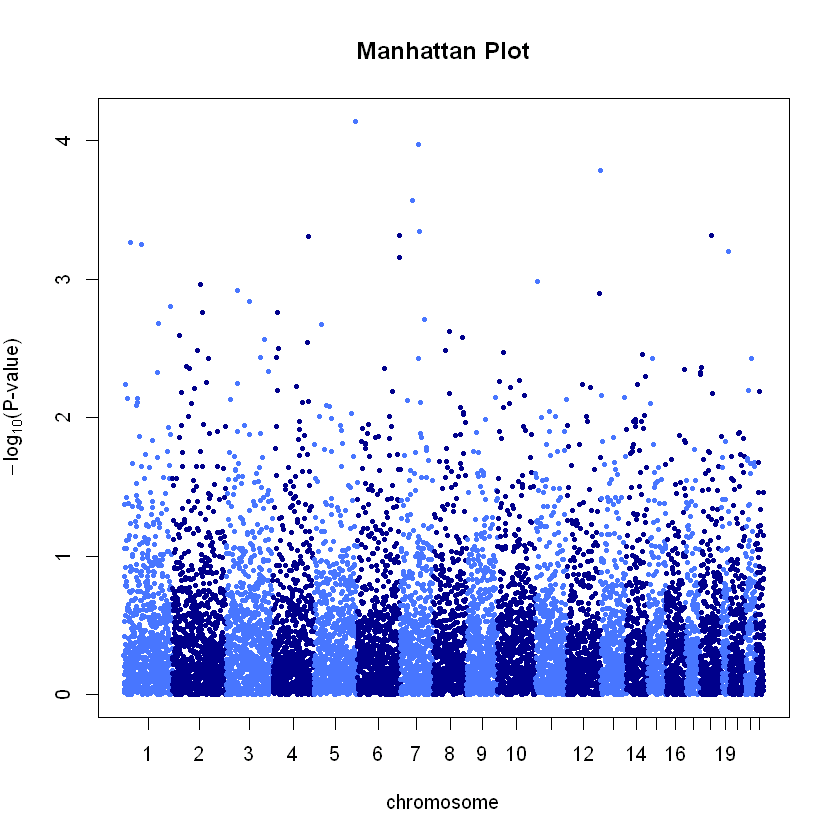

In [25]:
#pdf('manh.pdf')
plot(CM, Y, type="n",xaxt="n", xlab="chromosome", ylab=expression(paste(-log[10],"(P-value)") ), main="Manhattan Plot")
for (i in 1:n.chr) {
 u <- chrindex[i]
 l <- chrindex[i] - allchr[i] + 1
 chr <- l:u
 y <- -log(data2$P[chr], 10)
 points(CM[chr], y, col = chr_colors[i],
 cex = 0.8, pch=20)
 midchr<- chrindex[i] - allchr[i]/2 + 1
 chrlabel_pos[i] <-CM[midchr]
}
axis(1, at = chrlabel_pos, labels = labels)
abline(h=-log10(0.05/length(Y)),lty=2)
#dev.off()


### Visualization : Manhattan plot and regional plot with R

- install은 한번만 하면 됨.

In [ ]:
install.packages("gap" ,  repos="http://cran.nexr.com/"  )

In [29]:
library(gap)

gap version 1.1-16

Attaching package: 'gap'

The following object is masked _by_ '.GlobalEnv':

    mhtdata



In [30]:
#pdf('rplot.pdf')
asplot(CDKNlocus, CDKNmap, CDKNgenes, best.pval=5.4e-8, sf=c(3,6))
title("CDKN2A/CDKN2B Region")
#dev.off()


- CDKN2A 
- CDKN2B 


### Visualization : QQ plot

In [32]:
p.val <- data2$P
y <- -log(p.val,10)
v <- -log10(0.05/sum(is.finite(y)))
o.y <- sort(y[is.finite(y)],decreasing=T)
xx<- (1:length(o.y))/length(o.y)
x <- -log(xx,10)
ifelse(max(o.y[is.finite(o.y)])>=x[1],YY<-o.y,YY<-x)

[1] 4.140742

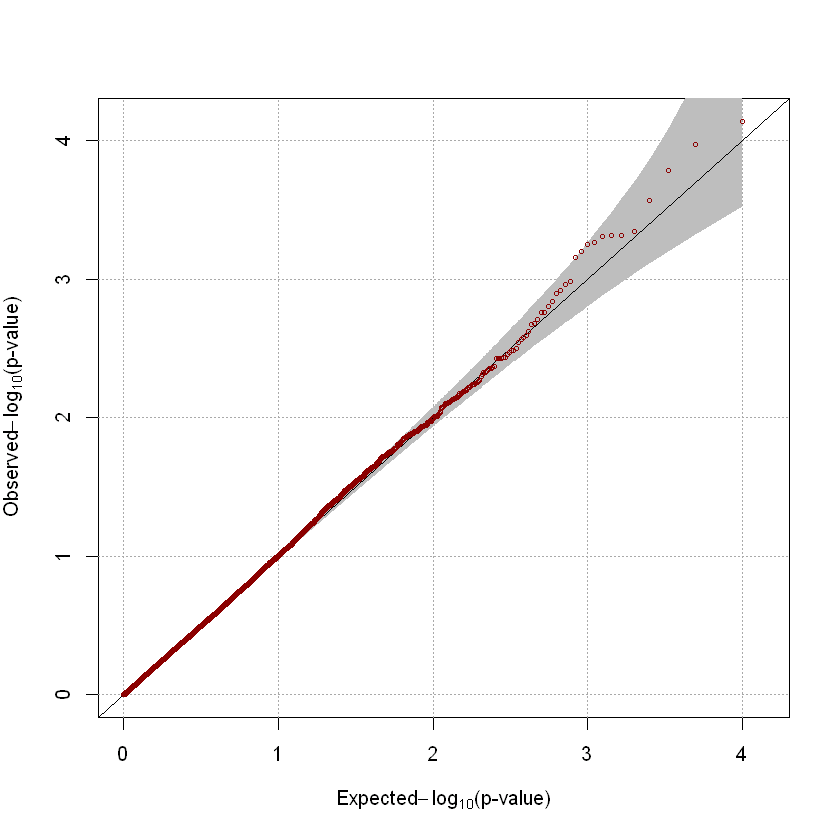

In [36]:
## plot
#pdf("QQplot.pdf")
plot(YY, YY, type = "n", 
     xlab = expression(paste("Expected",-log[10],"(p-value)")), 
     ylab = expression(paste("Observed",-log[10],"(p-value)")) )
N <- length(o.y)
c95 <- rep(0,N)
c05 <- rep(0,N)
for(i in 1:N){
    c95[i] <- qbeta(0.95,i,N-i+1)
    c05[i] <- qbeta(0.05,i,N-i+1)
}
abline(h = c(0:max(max(x),max(o.y[is.finite(o.y)]))), 
       v=c(0:max(max(x),max(o.y[is.finite(o.y)]))), 
       col = "darkgray", lty=3)
polygon(c(x,sort(x)),c(-log(c95,10), sort(-log(c05,10))),col=c("gray"),border=NA)
abline(a=0,b=1,col="black", lty=1)
points(x, o.y, cex = .5, col = "dark red")
#dev.off()